In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/arghyam_project/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
arghyam_od.ipynb		train3
bfm_classification.ipynb	water_meter2
classification_data		water_meter2.zip
classification_data_binary.zip	yolo_final_data
classification_data.zip		yolo_final_data_indivisual_numbers
__MACOSX			yolo_final_data_indivisual_numbers.zip
train				yolo_final_data.zip


In [2]:
import zipfile

# Specify the path to your zip file
zip_path = "/content/drive/MyDrive/arghyam_project/classification_data_binary.zip"

# Specify the directory where you want to extract the contents of the zip file
extract_path = "/content/drive/MyDrive/arghyam_project/"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Zip file extracted successfully.")

Zip file extracted successfully.


In [3]:
!pip install fastai -q --upgrade
!pip install -Uqq fastai duckduckgo_search
! [ -e /content ] && pip install -Uqq fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

In [1]:
from fastai.vision.all import *
from fastai.basics import *
from fastai.callback.all import *

In [2]:
damage_types = 'black', 'red'
path = Path('/opt/dlami/nvme/chronoscope/color_classification')

In [3]:
fns = get_image_files(path)
fns

(#1508) [Path('/opt/dlami/nvme/chronoscope/color_classification/red/field_292.jpeg'),Path('/opt/dlami/nvme/chronoscope/color_classification/red/20240909200351_C2272108_F21369_M7739459.png'),Path('/opt/dlami/nvme/chronoscope/color_classification/red/field_162.jpeg'),Path('/opt/dlami/nvme/chronoscope/color_classification/red/field_1976.jpeg'),Path('/opt/dlami/nvme/chronoscope/color_classification/red/field_379.jpeg'),Path('/opt/dlami/nvme/chronoscope/color_classification/red/field_1928.jpeg'),Path('/opt/dlami/nvme/chronoscope/color_classification/red/20240909162900_C2284333_F0_M7822563.png'),Path('/opt/dlami/nvme/chronoscope/color_classification/red/field_817.jpeg'),Path('/opt/dlami/nvme/chronoscope/color_classification/red/field_1744.jpeg'),Path('/opt/dlami/nvme/chronoscope/color_classification/red/field_2060.jpeg'),Path('/opt/dlami/nvme/chronoscope/color_classification/red/field_1668.jpeg'),Path('/opt/dlami/nvme/chronoscope/color_classification/red/20240909170600_C2272109_F0_M7836733.p

In [4]:
path.ls()

(#3) [Path('/opt/dlami/nvme/chronoscope/color_classification/red'),Path('/opt/dlami/nvme/chronoscope/color_classification/black'),Path('/opt/dlami/nvme/chronoscope/color_classification/.DS_Store')]

In [5]:
failed = verify_images(fns)
failed ,len(failed)

((#0) [], 0)

In [6]:
failed.map(Path.unlink)

(#0) []

In [7]:
damage_classifier = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

In [8]:
dls_damage = damage_classifier.dataloaders(path)

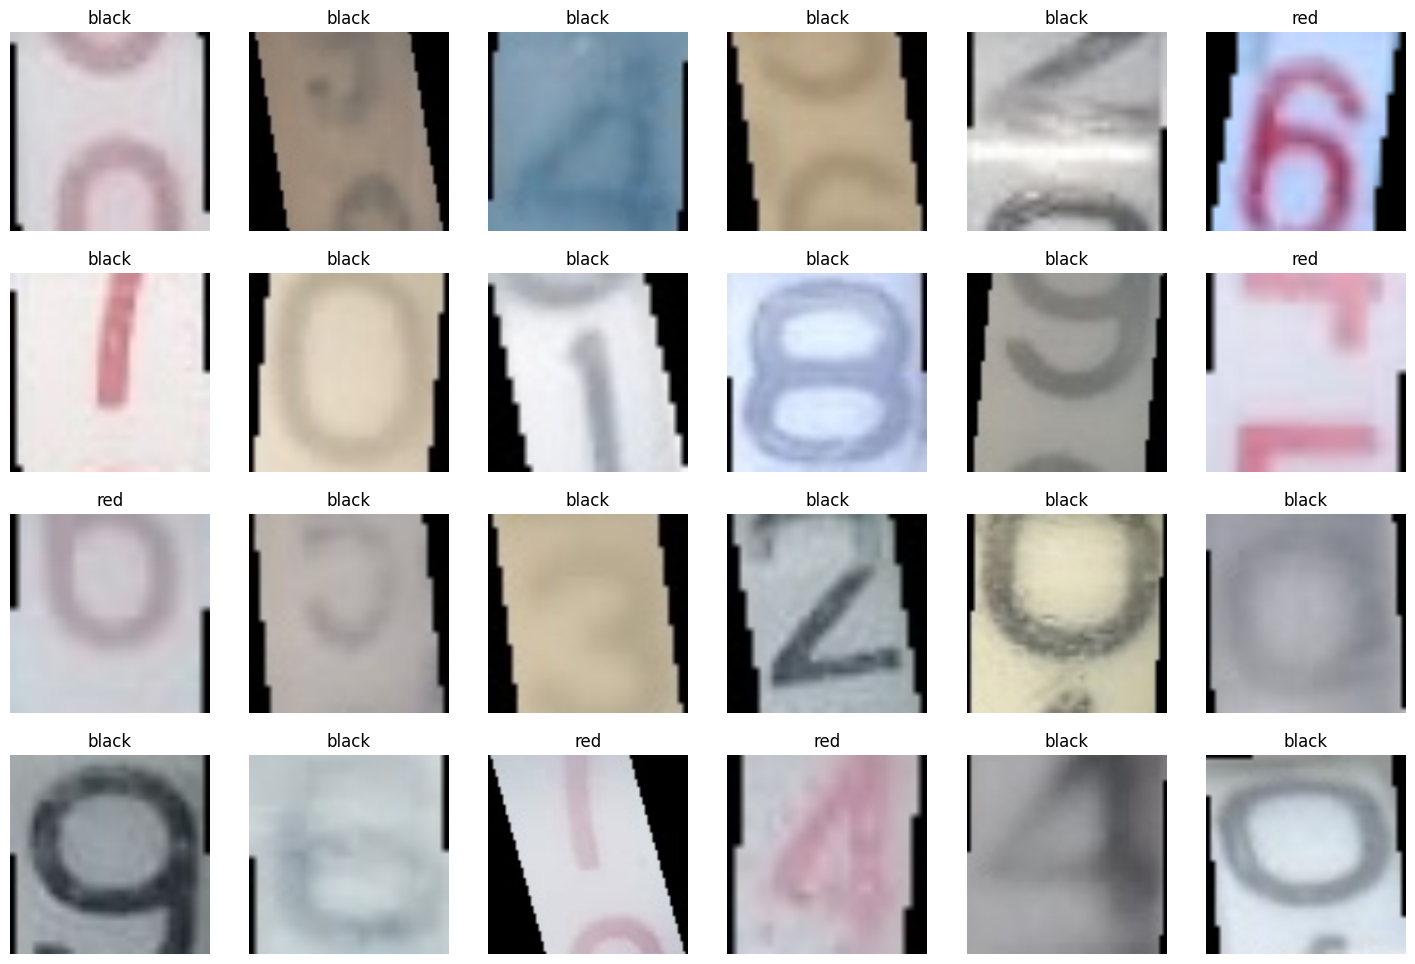

In [10]:
dls_damage.valid.show_batch(max_n=24, nrows=4)

In [ ]:
damage_classifier = damage_classifier.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = damage_classifier.dataloaders(path)

In [ ]:
dls.add_tfms]l

<bound method DataLoaders.add_tfms of <fastai.data.core.DataLoaders object at 0x7b26b30d01d0>>

In [11]:
learn = vision_learner(dls_damage, resnet50, metrics=error_rate)
learn.fine_tune(7)

epoch,train_loss,valid_loss,error_rate,time
0,0.783518,0.164779,0.036545,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.462463,0.255877,0.036545,00:04
1,0.401821,0.355897,0.023256,00:04
2,0.330178,0.434604,0.033223,00:04
3,0.267206,0.451021,0.029900,00:04
4,0.216515,0.423411,0.033223,00:04
5,0.191659,0.427692,0.036545,00:04
6,0.168299,0.418047,0.036545,00:04


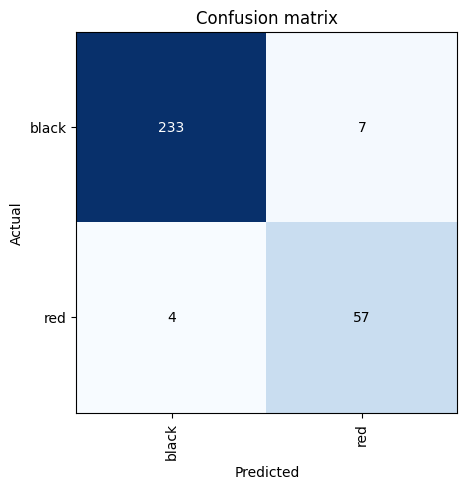

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

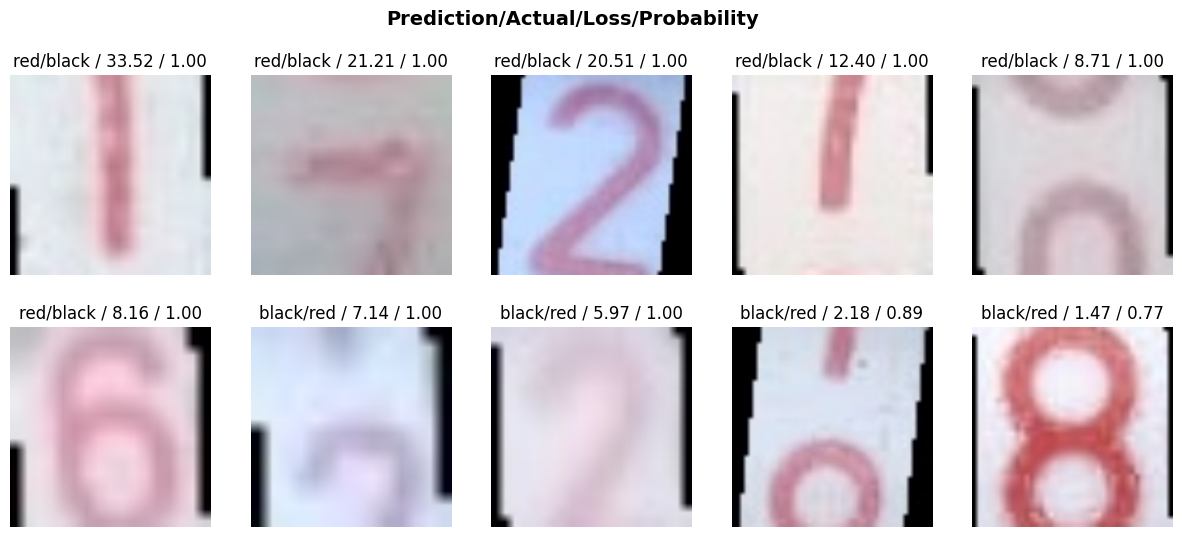

In [13]:
interp.plot_top_losses(10, nrows=2)

In [ ]:
interp.show_results

<bound method Interpretation.show_results of <fastai.interpret.ClassificationInterpretation object at 0x7b26b30d0390>>

In [14]:
interp.print_classification_report()

              precision    recall  f1-score   support

       black       0.98      0.97      0.98       240
         red       0.89      0.93      0.91        61

    accuracy                           0.96       301
   macro avg       0.94      0.95      0.94       301
weighted avg       0.96      0.96      0.96       301



In [ ]:
import pandas as pd


def get_misclassified_images_to_csv(learn, output_path='misclassified_images.csv'):
    interp = ClassificationInterpretation.from_learner(learn)

    # Get predictions with probabilities (using softmax activation)
    probs, targs, decoded = learn.get_preds(dl=interp.dl, with_decoded=True,
                                          with_preds=True, with_targs=True)

    # Get losses and indices
    losses, indices = interp.top_losses(k=None)

    data = {
        'image_path': [],
        'true_label': [],
        'predicted_label': [],
        'prediction_probability': [],  # Adding probability
        'loss': []
    }

    for idx, loss in zip(indices, losses):
        if decoded[idx] != targs[idx]:  # Only include misclassified
            # Get the probability of the predicted class
            pred_prob = probs[idx].max().item()  # Gets the highest probability

            data['image_path'].append(str(interp.dl.items[idx]))
            data['true_label'].append(interp.vocab[targs[idx].item()])
            data['predicted_label'].append(interp.vocab[decoded[idx].item()])
            data['prediction_probability'].append(f"{pred_prob:.4f}")  # Format to 4 decimal places
            data['loss'].append(f"{loss.item():.4f}")

    # Create DataFrame and sort by loss
    df = pd.DataFrame(data)
    df = df.sort_values('loss', ascending=False)

    # Save to CSV
    df.to_csv(output_path, index=False)
    print(f"Saved misclassified images information to {output_path}")

    return df


# Usage:
df = get_misclassified_images_to_csv(learn, 'misclassified_images.csv')

# You can also view the first few entries
print("\nFirst few misclassifications:")
print(df.head())

Saved misclassified images information to misclassified_images.csv

First few misclassifications:
                                                                                                    image_path  \
5                               /content/drive/MyDrive/arghyam_project/classification_data/Good/field_821.jpeg   
6  /content/drive/MyDrive/arghyam_project/classification_data/Good/20240909172201_C2272071_F21369_M7846222.png   
7                               /content/drive/MyDrive/arghyam_project/classification_data/Good/field_338.jpeg   
8                               /content/drive/MyDrive/arghyam_project/classification_data/Good/field_162.jpeg   
9                       /content/drive/MyDrive/arghyam_project/classification_data/Out_of_focus/field_437.jpeg   

     true_label predicted_label prediction_probability    loss  
5          Good        Oriented                 0.9807  9.7080  
6          Good          Blurry                 0.9957  9.3789  
7          Good       

In [15]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:

for idx in cleaner.delete():
  cleaner.fns[idx].unlink()
for idx,cat in cleaner.change():
  shutil.move(str(cleaner.fns[idx]), path/cat)

<bound method ImagesCleaner.values of <fastai.vision.widgets.ImagesCleaner object at 0x7b265e3aa290>>

In [16]:
learn.save('/opt/dlami/nvme/chronoscope/color_classification/stage_1')

Path('/opt/dlami/nvme/chronoscope/color_classification/stage_1.pth')

In [17]:
learn.load('stage_1')

FileNotFoundError: [Errno 2] No such file or directory: 'models/stage_1.pth'

In [18]:
learn.unfreeze()
learn.fit_one_cycle(10, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.080850,0.412648,0.033223,00:05
1,0.100106,0.430094,0.033223,00:04
2,0.110276,0.416452,0.033223,00:05
3,0.112299,0.425633,0.029900,00:04
4,0.104062,0.410212,0.033223,00:04
5,0.098690,0.417573,0.033223,00:05
6,0.092953,0.441927,0.033223,00:05
7,0.092433,0.449220,0.033223,00:04
8,0.082462,0.415954,0.033223,00:04
9,0.086409,0.425975,0.033223,00:04


In [19]:
learn.save('/opt/dlami/nvme/chronoscope/color_classification/stage_2')

Path('/opt/dlami/nvme/chronoscope/color_classification/stage_2.pth')

In [20]:
learn.export("/opt/dlami/nvme/chronoscope/color_classification/color_classification_fastai")

In [ ]:
label_,a,probs = learn.predict('/content/drive/MyDrive/car_damage_fastai/car_damaged/damage/0714.JPEG')
print(f"This is a: {label_}.")
print(f"Probability it is a {label_} : { probs[int(a.numpy())]:.4f} ")

This is a: damage.
Probability it is a damage : 1.0000 


In [ ]:
!cp -r /content/models/stage_2.pth /content/drive/MyDrive/car_damage_fastai/

In [ ]:
!cp -r /content/damaged_notdamaged_fastai /content/drive/MyDrive/car_damage_fastai/